# Eurostat

In [1]:
import eurostat
toc = eurostat.get_toc_df()
toc[['Electricity' in i for i in toc['title']]]

,title,code,type,last update of data,last table structure change,data start,data end
5227,"Electricity, gas and water by employment size ...",sbs_sc_2d_el95,dataset,24.05.2016,08.02.2021,1995,2001
5228,"Electricity, gas and water by employment size ...",sbs_sc_2d_el02,dataset,24.05.2016,08.02.2021,2002,2007
7105,Electricity production capacities by main fuel...,nrg_inf_epc,dataset,18.01.2022,14.01.2022,1990,2020
7106,Electricity production capacities for renewabl...,nrg_inf_epcrw,dataset,11.11.2021,11.11.2021,1990,2020
7107,Electricity production capacities for combusti...,nrg_inf_epct,dataset,18.01.2022,14.01.2022,1990,2020
7141,Electricity available to internal market,nrg_cb_eim,dataset,20.01.2022,17.01.2022,2008M01,2021M11
7188,Electricity prices for household consumers - b...,nrg_pc_204,dataset,26.10.2021,20.09.2021,2007S1,2021S1
7189,Electricity prices for non-household consumers...,nrg_pc_205,dataset,10.11.2021,20.09.2021,2007S1,2021S1
7196,Electricity prices components for household co...,nrg_pc_204_c,dataset,07.10.2021,21.05.2021,2007S2,2020
7197,Electricity prices components for non-househol...,nrg_pc_205_c,dataset,07.10.2021,21.05.2021,2007S2,2020


In [2]:
def thick_line(symbol,ax,col=None):
    labels=[i._label for i in ax.lines]  #makes a list of symbols in the order of lines in the axis object
    i=labels.index(symbol)               #identifies at which position symbol is located
    ax.lines[i].set_linewidth(5)         #sets the line with of the line at position i to 5 
    ax.lines[i].set_alpha(1)             #sets removes transparancy of the line at position i to 5 
    if not col is None:
        ax.lines[i].set_color(col)

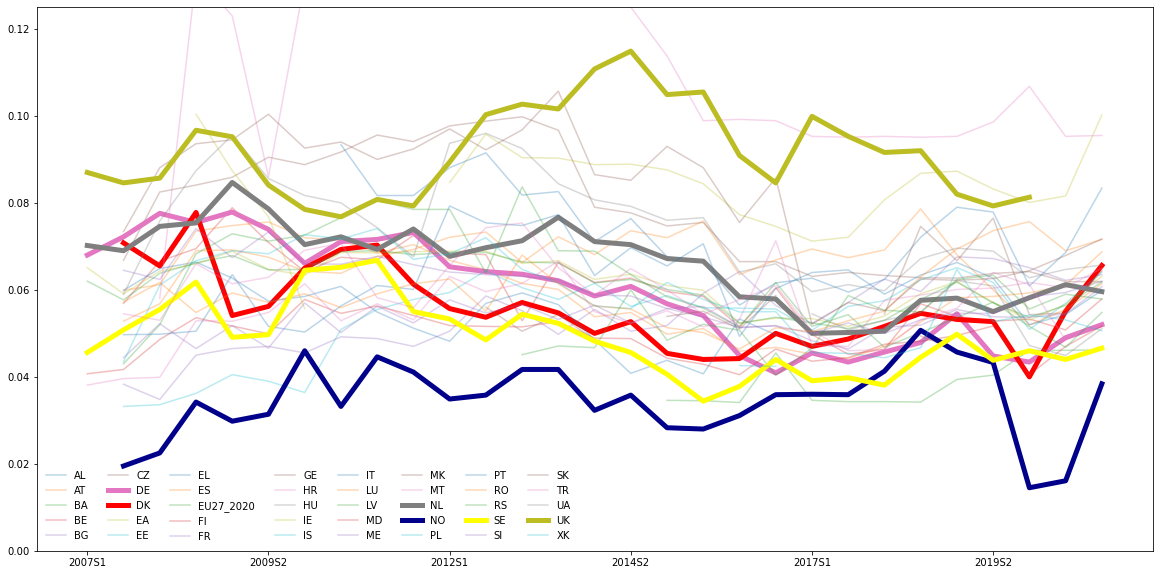

In [3]:
import eurostat
import numpy as np
df = eurostat.get_data_df('nrg_pc_205')
df=df[(df['tax']=='X_TAX')*
   (df['consom']=='4162906')*
   (df['currency']=='EUR')*
     (df!=0).all(axis=1)]

cols=['geo\\time']+[f"{y}S{s}" for y in range(2007,2022) for s in [1,2]][:-1]
df=df[cols].set_index('geo\\time').transpose()
ax=df.plot(alpha=0.3,figsize=(20, 10))
ax.set_ylim([0, 0.125])
thick_line('DE',ax)
thick_line('NO',ax,'darkblue')
thick_line('NL',ax)
thick_line('UK',ax)
thick_line('SE',ax,'yellow')
thick_line('DK',ax,'red')
ax.legend(loc='lower left',frameon=False,ncol=8)


# SSB-nordpool

In [15]:
import pandas as pd
data = pd.read_csv("kraft pris-prod.csv", sep=';')
data

,Dato,Pris,Total kraftproduksjon,Import,Eksport
0,2010-01-01,411.32,14825249,955497,802312
1,2010-02-01,642.71,12624913,936811,411703
2,2010-03-01,484.36,11229016,1447281,150579
3,2010-04-01,385.48,8708195,1657794,118342
4,2010-05-01,355.46,7599771,2077840,284937
...,...,...,...,...,...
138,2021-07-01,576.47,11050841,351895,2587240
139,2021-08-01,748.34,10398598,587506,1771055
140,2021-09-01,1083.67,11234852,419531,2163714
141,2021-10-01,961.13,12359480,979048,2238711


In [36]:
from statsmodels.regression.linear_model import OLS
preF2021=data['Dato']<'2021-06-01'
data['Nettoeksport %'] = (data['Eksport']-data['Import'])/data['Total kraftproduksjon']
y=pd.DataFrame(data['Nettoeksport %'])
y['Intercept']=1

res=OLS(data['Pris'][preF2021],y[preF2021]).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pris   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     72.86
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.54e-14
Time:                        15:36:28   Log-Likelihood:                -827.86
No. Observations:                 137   AIC:                             1660.
Df Residuals:                     135   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Nettoeksport %  -739.9745     86.688     -8.

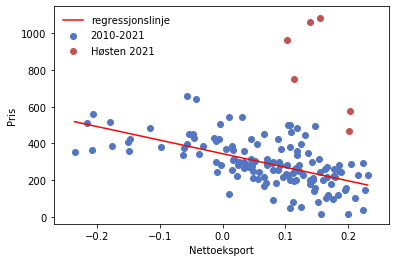

In [49]:
import numpy as np
from matplotlib import pyplot as plt




fig,ax=plt.subplots()


ax.set_ylabel('Pris')
ax.set_xlabel('Nettoeksport')



ax.scatter(data['Nettoeksport %'][preF2021], data['Pris'][preF2021],               label='2010-2021',    color='#5376c2')
ax.scatter(data['Nettoeksport %'][preF2021==False], data['Pris'][preF2021==False], label='Høsten 2021',    color='#c25353')

x=np.linspace(min(data['Nettoeksport %']),max(data['Nettoeksport %']),100)

ax.plot(x,res.params[1]+res.params[0]*x , label='regressjonslinje',    color='#ed0909')

#5. adding legend in the upper left corner:
ax.legend(loc='upper left',frameon=False)


In [43]:
res.params[0]

-739.9745320656751